# READING DATA

# 20BCS6444

# Importing packages for Mathematical operations and Data Visualisation and also importing warnings package so that the warnings which may arise during the runtime can be avoided.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

Reading the .csv file

In [2]:
df = pd.read_csv("D:\PYTHON\Python For Machine Learning\Data\carprices.csv")
df.head()

,Mileage,Age(yrs),Sell Price($)
0,69000,6,18000
1,35000,3,34000
2,57000,5,26100
3,22500,2,40000
4,46000,4,31500


# DATA INSPECTION

# 20BCS6444 

# Our Dataset has 20 Rows and 3 columns[ Mileage, Age(yrs) and Sell Price]
# All the data in our Dataset is of Integer Type

In [3]:
df.shape

(20, 3)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Mileage        20 non-null     int64
 1   Age(yrs)       20 non-null     int64
 2   Sell Price($)  20 non-null     int64
dtypes: int64(3)
memory usage: 608.0 bytes


In [5]:
df.describe()

,Mileage,Age(yrs),Sell Price($)
count,20.000000,20.000000,20.000000
mean,59736.500000,5.150000,25197.500000
std,20595.441825,1.785173,7834.479713
min,22500.000000,2.000000,12000.000000
25%,50500.000000,4.000000,19375.000000
50%,59000.000000,5.000000,26050.000000
75%,73750.000000,6.250000,31625.000000
max,91000.000000,8.000000,40000.000000


# DATA CLEANING

# 20BCS6444

# There are no null values present in the data so we dont need to remove any Null Values.
# Using Boxplot we can see there are no considerable outliers present in the data.

In [6]:
df.isnull().sum()

Mileage          0
Age(yrs)         0
Sell Price($)    0
dtype: int64

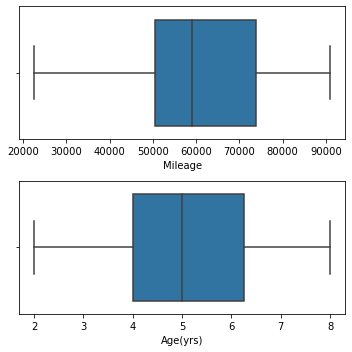

In [7]:
fig, axs = plt.subplots(2, figsize = (5,5))
plt1 = sns.boxplot(df['Mileage'], ax = axs[0])
plt2 = sns.boxplot(df['Age(yrs)'], ax = axs[1])
plt.tight_layout()

# Exploratory Data Analysis

# 20BCS6444

# Our Target variable for this linear regression problem is Sell Price so we need to see the relation between sell price and the other two variables and therefore check if multi-collinearity exitsts or not.

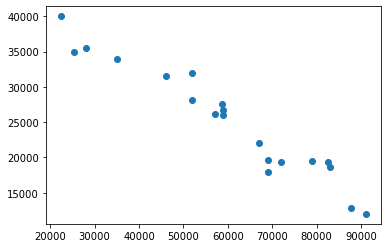

In [8]:
plt.scatter(df['Mileage'],df['Sell Price($)'])

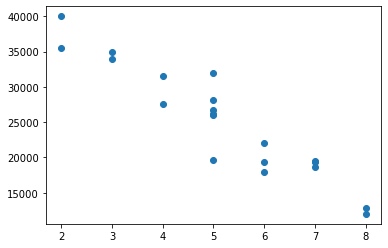

In [9]:
plt.scatter(df['Age(yrs)'],df['Sell Price($)'])

In [10]:
map = df.corr()
map

,Mileage,Age(yrs),Sell Price($)
Mileage,1.000000,0.968290,-0.967173
Age(yrs),0.968290,1.000000,-0.941522
Sell Price($),-0.967173,-0.941522,1.000000


# 20BCS6444

# can clearly se that the variables 'Age' and 'Years' have a negative collinearity with the target variable 'Sell Price'. Therefore, multi-collinearity exists in the data.
# Heatmap produced using seaborn shows that:
# correlation between Sell price and Age is 0.97 
# correlation between Sell price and Mileage is 0.94 

<AxesSubplot:>

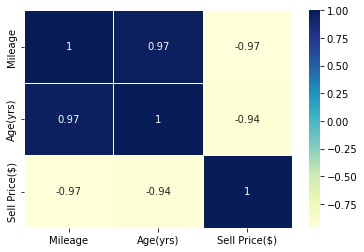

In [11]:
sns.heatmap(map,annot=True,linewidth=.5, cmap ="YlGnBu")

# BUILDING LINEAR MODEL

# 20BCS6444

# For our Dataset, the independent variable is 'Sell Price' and dependent variables are 'Age(yrs)'and'Mileage'

In [12]:
X =df[['Age(yrs)','Mileage']]
y=df['Sell Price($)']

Checking Rows and Columns in X and y

In [13]:
X.shape

(20, 2)

In [14]:
y.shape

(20,)

# 20BCS6444

# Now we need to split the data into two sets namely Training set and Testing set. We have imported 'train_test_split' module from the package sklearn

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [17]:
X_train.shape

(16, 2)

In [18]:
X_test.shape

(4, 2)

# 20BCS6444

# We import the LinearRegression from sklearn and use the xtrain and ytrain parameters in the fit function to train the dataset and obtain the best fit for the model.

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
clf=LinearRegression()

In [21]:
clf.fit(X_train,y_train)

LinearRegression()

In [22]:
clf.predict(X_test)

array([28374.58318304, 22308.32645336, 15821.82788689, 25808.21277719])

# 20BCS6444
# Now we have the predicted as well as the actual values. We will display them in a dictionary so we can have clear visualisation of the data obtained

In [23]:
y_test

19    28200
0     18000
18    12800
12    26000
Name: Sell Price($), dtype: int64

In [24]:
comp=pd.DataFrame({"Predicted":clf.predict(xtest),'Actual':ytest})

NameError: name 'xtest' is not defined

In [ ]:
comp.head()

# 20BCS6444

# Calculating the Error in each observation by subtracting the Predicted values from the actual values.
# And the calculating Accuracy score using Linear Regression model by giving X_test and y_test as variables.

In [ ]:
comp['Residual'] = comp['Predicted']-comp['Actual']

In [ ]:
comp.head()

In [ ]:
clf.score(xtest,ytest)